<img src="Images/IMG-Wine-Quality_Banner.png" alt="Title Banner" style="display: block; margin-left: auto; margin-right: auto; width: 100%">

---
Wein hat Klasse, [das ist unbestritten](https://tvtropes.org/pmwiki/pmwiki.php/Main/WineIsClassy). Aber kann man die subjektive Qualität von Wein anhand seiner chemischen Eigenschaften klassifizieren? 

<img src="Images/IMG-sklearn-logo.png" alt="Title Banner" style="float:right; display: block; margin-left: auto; margin-right: auto; width: 30%">

Probieren wir es aus! Dazu werden wir einige Klassifikatoren und weitere Funktionen aus dem Python-Paket [```scikit-learn```](https://scikit-learn.org/stable/user_guide.html) (kurz: ```sklearn```) verwenden. ```Sklearn``` ist ein äußerst mächtiges Framework, das viele Methoden des Maschinenlernens mit einheitlichen Schnittstellen zur Verfügung stellt, so dass Sie schnell und einfach verschiedene Klassifikatoren ausprobieren können. Im Laufe dieses Notebooks werden Sie einige der Funktionenen und Objekte zur Klassifikation kennenlernen. In dem Notebook _"Vorhersage des Alkoholgehalts von Wein"_ werden Sie ebenfalls mit ```sklearn``` arbeiten, allerdings mit dem Fokus auf die Methoden und Objekte zur Lösung von Regressionsproblemen.

Grundsätzlich gilt für beide Notebooks, dass Sie immer auch in der Dokumentation und dem User's Guide von ```sklearn``` sich weitere Informationen zu den verwendeten Objekten holen sollten, um ein tieferes Verständnis für die Zusammenhänge zu erwerben.


## Inhalt
<table style="width:256; border: 1px solid black; display: inline-block">
  <tr>
    <td  style="text-align:right" width=64px><img src="Images/IMG-csv-in.png" style="float:left"></td>
      <td style="text-align:left" width=128px>
          <a style="color:black; font-size:14px; font-weight:bold; text-decoration:none" href='#import_data'>Daten importieren</a>
      </td>
  </tr>
  <tr>
    <td style="text-align:right"><img src="Images/IMG-magnifying-glass.png" style="float:left"></td>
    <td style="text-align:left" width=128px><a style="color:black; font-size:14px; font-weight:bold; text-decoration:none" href='#analyze_data'>Daten analysieren</a>
      </td>
  </tr>
    <tr>
    <td style="text-align:right"><img src="Images/IMG-broom.png" style="float:left"></td>
    <td style="text-align:left" width=128px><a style="color:black; font-size:14px; font-weight:bold; text-decoration:none" href='#clean_data'>Daten säubern</a>
        </td>
    </tr>
    <tr>
    <td style="text-align:right"><img src="Images/IMG-gears.png" style="float:left"></td>
    <td style="text-align:left" width=128px><a style="color:black; font-size:14px; font-weight:bold; text-decoration:none" href='#build_model'>Modellauswahl</a>
        </td>
        <tr>
    <td style="text-align:right"><img src="Images/IMG-new-file-out.png" style="float:left"></td>
    <td style="text-align:left" width=128px><a style="color:black; font-size:14px; font-weight:bold; text-decoration:none" href='#save_model'>Modell speichern</a>
        </td>
  </tr>
</table>

**Hinweis:** In diesem Notebook sind einige Stellen enthalten, an denen Zufallszahlen zum Einsatz kommen (z.B. die Initialisierung des neuralen Netzes oder die Einteilung in Trainings- und Testset). Dadurch kann es passieren, dass manche Ergebnisse für Sie nicht exakt reproduzierbar sind und das relative Ranking der verschiedenen Klassifikatoren bei Ihnen etwas anders aussieht. Das ändert allerdings nichts an der generellen Vorgehensweise oder den Programmiermustern. 

---


<a id='import_data'></a><div><img src="Images/IMG-csv-in.png" style="float:left"> <h2 style="position: relative; top: 6px; left:5px">1. Daten importieren</h2>
<p style="position: relative; top: 10px">
Die Daten der Weine wurden im Rahmen einer <a href='#data_source'>wissenschaftlichen Studie erhoben</a> und die genaue Bedeutung der einzelnen Merkmale können Sie in dem entsprechenden Paper nachlesen. Die gelisteten Merkmale sind:


<table style="width:256; border: 1px solid black; display: inline-block">
    <tr>
        <td style="text-align:left"><p style="color:black; font-size:14px; font-weight:bold">Fixed acidity</p>
        </td>
        <td style="text-align:left"><p style="color:black; font-size:14px"><a href="https://www.wein.de/de/glossar/nichtfluechtige-saeure/">Nichtflüchtige Säure</a></p>
        </td>
    </tr>
    <tr>
        <td style="text-align:left"><p style="color:black; font-size:14px; font-weight:bold">Volatile acidity:</p>
        </td>
        <td style="text-align:left"><p style="color:black; font-size:14px"><a href="https://www.wein.de/de/glossar/fluechtige-saeure/">Flüchtige Säure</a></p>
        </td>
    </tr>
    <tr>
        <td style="text-align:left"><p style="color:black; font-size:14px; font-weight:bold">Citric acid:</p>
        </td>
        <td style="text-align:left"><p style="color:black; font-size:14px"><a href="https://www.wein.de/de/glossar/zitronensaeure/">Zitronensäure</a></p>
        </td>
    </tr>
    <tr>
        <td style="text-align:left"><p style="color:black; font-size:14px; font-weight:bold">Residual sugar:</p>
        </td>
        <td style="text-align:left"><p style="color:black; font-size:14px"><a href="https://www.wein.de/de/glossar/restzucker-oder-restsuesse/">Restzucker</a></p>
        </td>
    </tr>
    <tr>
        <td style="text-align:left"><p style="color:black; font-size:14px; font-weight:bold">Chlorides:</p>
        </td>
        <td style="text-align:left"><p style="color:black; font-size:14px">Chloride</p>
        </td>
    </tr>
    <tr>
        <td style="text-align:left"><p style="color:black; font-size:14px; font-weight:bold">Free sulfur dioxide:</p>
        </td>
        <td style="text-align:left"><p style="color:black; font-size:14px"><a href="https://www.wein.de/de/glossar/schwefeln/">Freies Schwefeldioxid</a></p>
        </td>
    </tr>
    <tr>
        <td style="text-align:left"><p style="color:black; font-size:14px; font-weight:bold">Total sulfur dioxide:</p>
        </td>
        <td style="text-align:left"><p style="color:black; font-size:14px"><a href="https://www.wein.de/de/glossar/schwefeln/">Schwefeldioxid gesamt</a></p>
        </td>
    </tr>
    <tr>
        <td style="text-align:left"><p style="color:black; font-size:14px; font-weight:bold">Density:</p>
        </td>
        <td style="text-align:left"><p style="color:black; font-size:14px">Dichte</p>
        </td>
    </tr>
        <tr>
        <td style="text-align:left"><p style="color:black; font-size:14px; font-weight:bold">pH:</p>
        </td>
        <td style="text-align:left"><p style="color:black; font-size:14px"><a href="https://www.wein.de/de/glossar/ph-wert/">pH-Wert</a></p>
        </td>
    </tr>
        <tr>
        <td style="text-align:left"><p style="color:black; font-size:14px; font-weight:bold">Sulphates</p>
        </td>
        <td style="text-align:left"><p style="color:black; font-size:14px">Sulfate</p>
        </td>
    </tr>
        <tr>
        <td style="text-align:left"><p style="color:black; font-size:14px; font-weight:bold">Alcohol:</p>
        </td>
        <td style="text-align:left"><p style="color:black; font-size:14px">Alkoholgehalt</p>
        </td>
    </tr>
        <tr>
        <td style="text-align:left"><p style="color:black; font-size:14px; font-weight:bold">Quality:</p>
        </td>
        <td style="text-align:left"><p style="color:black; font-size:14px">Zu bestimmende subjektive Qualtitätsbewertung</p>
        </td>
    </tr>
    </table>   

<a id='data_source'></a><b>Quelle der Daten:</b> P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

</p>

Uns liegen zwei Datensätze zu, von denen einer nur Rotweine und der andere nur Weißweine enthält. Für dieses Notebook wollen wir mal annehmen, dass die Farbe des Weins keinen Einfluss auf das Ergebnis hat.

Die ersten Schritt sind daher der Import und die Verbindung der beiden Datensätze. Die Daten befinden sich in ```Data/winequality-red.csv``` und ```Data/winequality-white.csv```

In [1]:
import pandas as pd  # Siehe Preprocessing/Lego-Sets/Lego Sets Preprocessing.ipynb für eine Einführung in Pandas

# Datensätze importieren (pandas Funktion: pd.read_csv() Achtung: Trennzeichen ist hier das Semikolon ";"!)
df_red = pd.read_csv("Data/winequality-red.csv", sep = ';')
df_white = pd.read_csv("Data/winequality-white.csv",  sep = ';')
# Verbinden Sie die beiden Datensätze mit pd.concat()
df = pd.concat([df_red, df_white], axis = 0)
print(df)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  

<a id='analyze_data'></a><div><img src="Images/IMG-magnifying-glass.png" style="float:left"> <h2 style="position: relative; top: 6px; left:5px" >2. Daten analysieren</h2>
    
<p style="position: relative; top: 10px">
Als nächstes wollen wir uns die Daten mal näher ansehen. Benötigen wir eine Konvertierung von Merkmalen? Müssen Werte aufgefüllt werden?</p>


In [2]:
# Beginnen wir mit ein bisschen deskriptiver Statistik (pandas-Funktion describe()):
df.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


Wir stellen drei wichtige Tatsachen fest:

1. Es gibt insgesamt 6497 Weine gibt, für die uns Daten vorliegen (__```count```__), zumindest gibt es so viele Einträge in jeder Spalte. Wir müssen also erfreulicherweise keine Daten auffüllen! 
2. Alle Merkmale sind rein numerisch. Wir müssen also auch keine Daten konvertieren!
3. Die Daten sind sehr unterschiedlich skaliert, da die Mittelwerte (__```mean```__) und Standardabweichungen (__```std```__) über mehrere Größenordnungen hinweg streuen.

Daher bietet es sich an, die Spalten zunächst einzeln zu standardisieren, so dass sie jeweils einen Mittelwert von 0 und eine Standardabweichung von 1 haben (auch $z$-Score Normalisierung genannt). Dadurch werden also alle Merkmale in die gleiche Größenordnung gebracht, ohne die relative Verteilung zu vereinfachen.

Unser Fahrplan für die Säuberung der Daten ist also klar:
- Kein konvertieren oder auffüllen nötig
- Standardisierung der Daten empfehlenswert
---

<a id='clean_data'></a><div><img src="Images/IMG-broom.png" style="float:left"> <h2 style="position: relative; top: 6px; left:5px">3. Daten säubern</h2>
<p style="position: relative; top: 10px">
Wie bereits oben festgestellt, müssen wir keine Konvertierungen oder Ersetzungen machen, sondern nur die Standardisierung vornehmen. </p>

Bevor wir allerdings die Standardisierung vornehmen, sollten wir zunächst die Daten in Trainings- und Testset aufteilen, damit wir nicht schon bei der Standardisierung Daten verwenden, die eigentlich vom Modell "ungesehene" Testdaten sein sollen. Dazu teilen wir den Datensatz zunächst in die Merkmalvektorfolge $X$ und Klassenlabel $y$.

In [3]:
## Zunächst trennen wir den gesamten Datensatz in die Merkmale und die vorherzusagende Größe
X = df.drop(columns = ['quality']) # Alle Spalten von df außer 'quality'
y = df['quality'] # Nur die Spalte 'quality'

Nun kommt der eigentliche Split in Train- und Testset, den wir mit Hilfe der Funktion [```train_test_split()```](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) aus ```scikit-learn``` vornehmen wollen.

In [4]:
# Importieren Sie aus dem sklearn-Modul model_selection die Funktion train_test_split
from sklearn.model_selection import train_test_split

# Verwenden Sie nun die Funktion train_test_split(), um ein zurückgehaltenes (Holdout) Test-Set von 20% der gesamten Daten zu erhalten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

Jetzt können wir auf dem Trainingsset die Parameter für die Standardisierung bestimmen und diese auf Trainings- und Testdaten ausführen. Wir könnten dazu natürlich von Hand in jeder Spalte den Mittelwert subtrahieren und sie durch ihre Standardabweichung teilen. Eleganter geht es jedoch mit Hilfe des Objekts [```StandardScaler```](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html):

In [5]:
# Importieren Sie aus dem sklearn-Modul preprocessing das Objekt StandardScaler
from sklearn.preprocessing import StandardScaler
# Instanziieren Sie ein Objekt StandardScaler()
stdScaler = StandardScaler()
# Berechnen Sie die Standardisierungsparametr auf dem Trainingsset (!) X_train mit Hilfe der Funktion "fit()"
print(stdScaler.fit(X_train))
# Wenden Sie die **selbe** Standardisierung mit Hilfe der Methode transform() auf die Trainings- und Testdaten an
X_train = stdScaler.transform(X_train)
X_test = stdScaler.transform(X_test)

StandardScaler()


Beachten Sie, dass wir keinerlei Wissen aus dem Testset in unsere Berechnungen aufgenommen haben, da der ```StandardScaler``` nur auf den Trainingsdaten parametrisiert wurde!

Damit sind wir bei diesem sehr ordentlichen Datensatz schon am Ende der Datenaufbereitung und der nächste Schritt ist die Modellauswahl.

---

<a id='build_model'></a><div><img src="Images/IMG-gears.png" style="float:left"> <h2 style="position: relative; top: 6px; left:5px">4. Modellauswahl</h2>
<p style="position: relative; top: 10px">
Wir werden nun eine Reihe von Klassifikatoren auf den standardisierten Trainingsdaten trainieren und anhand der zurückgehaltenen Testdaten untereinander vergleichen. Um die Hyperparameter zu optimieren, dürfen wir also **nicht** die Testdaten verwenden, da Sie ja sonst schon Teil des Trainings wären. Stattdessen werden wir eine $k$-fache Kreuzvalidierung auf den Trainingsdaten durchführen, um die optimalen Hyperparameter für jeden Klassifikator zu bestimmen.
    
    
Allerdings stellt sich damit schon die Frage nach der Wahl des ersten Hyperparameters: Wie groß sollen wir $k$ wählen?


Die Antwort auf diese Frage kann uns ein Blick auf die Verteilung der Trainingslabel $y_\mathrm{train}$ liefern. Dazu importieren wir zunächst ein Paket zur grafischen Darstellung von Daten und schauen uns dann das Histogramm der Trainingslabel an.


Es gibt eine Vielzahl von solchen Paketen in Python, aber wir werden hier [matplotlib](https://matplotlib.org/) verwenden.</p>

Text(0, 0.5, 'Häufigkeit')

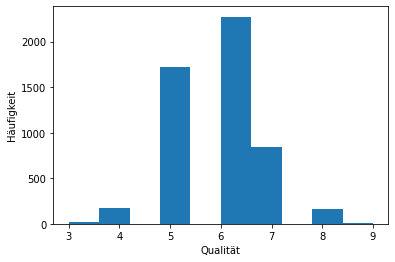

In [6]:
# Import des Moduls zum plotten aus Matplotlib
from matplotlib import pyplot as plt
# Dies ist ein sog. "Magic-Kommando", das die Darstellung der Plots direkt im Notebook ermöglicht. 
# Wenn Sie dieses vergessen, tauchen die Plots nicht auf!
%matplotlib inline

# Histogramm-Darstellung der bekannten Label im Training
plt.hist(y_train)
plt.xlabel("Qualität")
plt.ylabel("Häufigkeit")

Offenbar wurden die extremen Qualitätsbeurteilungen 3 und 9 nur sehr selten ausgesprochen. Das kann unter Umständen zum Problem werden: Wenn es weniger Beobachtungen zu einem bestimmten Label gibt, als wir Folds in der $k$-fachen Kreuzvalidierung haben, dann werden einige Folds keine einzige Beobachtung mit diesem Label enthalten. Es ist daher vorteilhaft, $k$ nicht größer als die kleinste vorkommende Häufigkeit eines Labels zu wählen.

Diese kleinste Häufigkeit können wir ganz einfach mit Hilfe ermitteln. Dazu verwenden wir Funktionen aus dem Paket [```numpy```](https://numpy.org/), das für numerische Berechnungen mit Matrizen in Python optimiert ist.

In [7]:
# Import von Numpy
import numpy as np

# Bestimme die Häufigkeiten jedes vorkommenden Wertes in dem Array y_train
labels, counts = np.unique(y_train, return_counts=True)
# Finde die kleinste Häufigkeit
min_counts = np.min(counts)
# Finde das Label mit der kleinsten Häufigkeit
rarest_label = labels[counts == min_counts]
# Ausgabe des seltensten Labels und der entsprechenden Häufigkeit
print("Das Label {} kommt nur {} Mal in den Trainingsdaten vor!".format(*rarest_label, min_counts))

Das Label 9 kommt nur 4 Mal in den Trainingsdaten vor!


Die maximale Anzahl Folds, bei der von allen Klassen Beobachtungen in jeder Fold enthalten wären, ist also $k=4$. 

Mit dieser Information im Hinterkopf machen wir uns nun also daran, einige Klassifikatoren auf den Trainingsdaten auszuprobieren. 

Der einfachste Klassifikator in ```sklearn```, den Sie in der Vorlesung kennengelernt haben, ist der [$k$ Nächste Nachbarn Klassifikator](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html). 

In [8]:
# Importieren Sie das Objekt KNeighborsClassifier aus dem Modul neighbors im Paket sklearn
from sklearn.neighbors import KNeighborsClassifier

# Instanziieren Sie ein Objekt vom Type KNeighborsClassifier mit den Standardeinstellungen für alle Parameter
knn_model = KNeighborsClassifier()
# Trainieren ("Fitten") Sie das Modell
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

Die Güte dieses Klassifikators (und auch jedes anderen Klassifikators in ```sklearn```) auf einem beliebigen Datensatz können Sie mit der Methode [```score()```](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier.score) bestimmen. Bei Klassifikatoren ist die Metrik hier standardmäßig die Genauigkeit: 

$$\mathrm{Genauigkeit} = \frac{\text{Anzahl korrekt klassifizierter Beobachtungen}}{\text{Gesamtanzahl Beobachtungen}}$$

In [9]:
# Trainingsgenauigkeit (in Prozent)
train_score_knn = knn_model.score(X_train, y_train)*100
# Testgenauigkeit (in Prozent)
test_score_knn = knn_model.score(X_test, y_test)*100
# Ausgabe der Performancemaße
print("Standard KNN - Training: {:.2f} % Test: {:.2f} %".format(train_score_knn, test_score_knn))

Standard KNN - Training: 70.06 % Test: 54.38 %


Die Performance mit den Standardeinstellungen ist noch nicht besonders gut. Eine Optimierung der Hyperparameter kann dieses Ergebnis deutlich verbessern. Für diese Optimierung verwenden wir eine $k$-fache Kreuzvalidierung mit dem oben bestimmten $k=4$.

Zur Optimierung der Hyperparameter ("Tuning des Modells") basierend auf Kreuzvalidierung bietet uns ```sklearn``` im Modul ```model_selection```(neben einigen anderen Varianten) das Objekt [```GridSearchCV```](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) an. Dieses Objekt führt eine Gittersuche (engl. _grid search_) auf einem vorgebenen Parametergitter aus und überprüft an jedem Gitterknoten die Performance des so parametrisierten Modells mit Hilfe von Kreuzvalidierung (engl. _crossvalidation_, CV). Dazu benötigt es den zu tunenden Klassifikator, das Parametergitter und weitere optionale Steuerparameter, wie die Anzahl der Folds in der Kreuzvalidierung.

Die Werte der Hyperparameter, die ausprobiert werden sollen, werden in Form einer Liste von [Dictionary](https://docs.python.org/3/tutorial/datastructures.html#dictionaries) übergeben. Jedes Dictionary enthält ein Gitter, das abgesucht wird. 

Am Ende wird das Modell mit dem als optimal identifizierten Hyperparametersatz auf allen Folds trainiert, so dass der Rückgabewert der Methode ```fit()``` einen auch im Sinne der Hyperparameter optimalen Klassifikator darstellt.

**Es empfiehlt sich sehr, die Hyperparameteroptimierung auf einem parallen Rechner auszuführen!*** Da jede Hyperparameterkonfiguration und jede Kreuzvalidierung unabhängig voneinander berechnet werden können, ist hier ein nahezu perfekter paralleler [Speedup](https://de.wikipedia.org/wiki/Speedup) möglich. Ein einfaches Beispiel:

Sie wollen prüfen, welche Zahl zwischen 1 und 10 die beste Zahl von Nachbarn in dem $k$ Nächste Nachbarn Klassifikator darstellt. Dazu müssen Sie also 10 Modelle mit 10 verschiedenen Werten für $k$ berechnen und diese miteinander vergleichen. Zum Vergleich wollen Sie jedes Modell mit 4 Folds validieren. Dazu müssen Sie also für jeden der 10 Werte von $k$ schon 4 Modell berechnen, also insgesamt 40 Trainingsvorgänge. Auf einem Single-CPU Rechner dauert dies dann zum Beispiel eine Minute. Da alle Berechnungen getrennt voneinander gemacht werden können, kann das exakt gleiche Training auf einem Parallelrechner mit z.B. 20 CPUs in 1/20 der Zeit gerechnet werden, also in diesem Beispiel in nur 3 Sekunden. Wenn noch weitere Hyperparameter optimiert oder mehr Werte ausprobiert werden sollen, explodiert der Rechenaufwand entsprechend durch die kombinatorische Vielfalt des Gitters. Parallele Ausführung ist hier also enorm wichtig. ***Wir empfehlen daher nachdrücklich das Arbeiten auf dem HPC (siehe [Einführung ins Praktikum](https://bildungsportal.sachsen.de/opal/auth/RepositoryEntry/23165501449/CourseNode/101490883666782))!***


In [10]:
# Importieren Sie das Objekt GridSearchCV aus dem Modul model_selection im Paket sklearn
from sklearn.model_selection import GridSearchCV

# Auswahl der zu testenden Hyperparameter (alle nicht spezifizierten bleiben auf dem Standardwert)
param_grid_knn = [
    {'n_neighbors': np.arange(1, 100, 1),  # Anzahl der Nachbarn; "arange" ist eine Numpy-Funktion zur Erzeugung einer Spanne
     'weights': ['uniform', 'distance'], # Gewichtung der Nachbarn in Entscheidungsfindung
     'p': [1, 2]},                       # Exponent der Abstandsfunktion (1: Manhattan; 2: Euklidisch)
]

# Instanziieren des Objekts "GridSearchCV"
knn_model = GridSearchCV(KNeighborsClassifier(), # Klassifikator, der benutzt werden soll
                         param_grid_knn,         # Hyperparametergitter
                         cv=4,                   # Anzahl der Folds für Kreuzvalidierung
                         verbose=10,             # Menge des Output während der Suche (größere Zahl -> mehr Info)
                         n_jobs=-1               # Anzahl der parallel genutzen CPUs; -1: alle verfügbaren CPUs nutzen
                        )

# Trainieren Sie das Modell
knn_model.fit(X_train, y_train)

Fitting 4 folds for each of 396 candidates, totalling 1584 fits


GridSearchCV(cv=4, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid=[{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                          'p': [1, 2], 'weights': ['uniform', 'distance']}],
             verbose=10)

Beachten Sie in der ersten Zeile der Ausgabe der Fit-Funktion die große Anzahl von zu trainierenden Modellen ("Fits"), die sich aus den relativ wenigen Hyperparametern ergeben haben. 

Die beste gefundenen Hyperparameterkombination können Sie über die Eigenschaft ```best_params_``` der Instanz von ```GridSearchCV``` auslesen:

In [11]:
print(knn_model.best_params_)

{'n_neighbors': 75, 'p': 1, 'weights': 'distance'}


Zum Vergleich der Perfomance zum unoptimierten $k$ Nearest Neighbor-Klassifikator berechnen wir wieder die Genauigkeiten auf Trainings und Testset:

In [11]:
train_score_knn = knn_model.score(X_train, y_train)*100
test_score_knn = knn_model.score(X_test, y_test)*100
print("Tuned KNN - Training: {:.2f} % Test: {:.2f} %".format(train_score_knn, test_score_knn))

Tuned KNN - Training: 100.00 % Test: 66.15 %


Schon besser, aber vielleicht funktioniert ein anderes Modell ja noch besser? 

Wir vesuchen es daher mit einer Support Vector Machine zur Klassifikation. In ```sklearn``` existiert dazu das Objekt ```SVC```. Beachten Sie, dass das Programmiermuster zum Training und Test (zunächst ohne Hyperparameteroptimierung) genau das gleiche ist wie bei dem Nächste Nachbarn Klassifikator:

In [12]:
# Import des Objekts SVC aus dem Modul svm im Paket sklearn
from sklearn.svm import SVC

# Instanziieren eines Objekts
svm_model = SVC(C=1)
# Trainieren Sie das Modell
svm_model.fit(X_train, y_train)
# Berechnen Sie den Trainings- und Testscore in Prozent
train_score_svm = svm_model.score(X_train, y_train)*100
test_score_svm = svm_model.score(X_test, y_test)*100

# Ausgabe der Performance
print("Support Vector Machine - Training: {:.2f} % Test: {:.2f} %".format(train_score_svm, test_score_svm))

Support Vector Machine - Training: 60.82 % Test: 54.69 %


Die Performance der unoptimierten SVM entspricht also ungefähr der des unoptimierten KNN. Aber auch Support Vector Machines haben Hyperparameter, die Sie optimieren sollten. Insbesondere die Wahl des Kernels und des Parameters $C$ (siehe Vorlesung).

**Achtung:** Die Dauer des Trainings ist stark abhängig von der Größe des Parameters $C$. Für kleine Werte von $C$ kann das Training schon nach wenigen Sekunden abgeschlossen sein, während es bei großen Werten durchaus mehrere Minuten dauern kann. Wundern Sie sich also nicht, wenn die Kreuzvalidierung zwischendurch "eingefroren" erscheint.

In [ ]:
# Parametergitter aufstellen
param_grid_svm = [
    {'C': np.logspace(-5, 2, 8), # Die Numpy-Funktion "logspace" liefert eine logarithmische Zahlenreihe (z. B. [0.01, 0.1, 1, 10])
     'kernel': ['linear', 'rbf']}
]

# Gittersuche aufsetzen
svm_model = GridSearchCV(SVC(), # Klassifikator, der benutzt werden soll
                         param_grid_svm,         # Hyperparametergitter
                         cv=4,                   # Anzahl der Folds für Kreuzvalidierung
                         verbose=10,             # Menge des Output während der Suche (größere Zahl -> mehr Info)
                         n_jobs=-1               # Anzahl der parallel genutzen CPUs; -1: alle verfügbaren CPUs nutzen
                        )
# Gittersuche durchführen
svm_model.fit(X_train, y_train)

Fitting 4 folds for each of 16 candidates, totalling 64 fits


Geben Sie wieder die besten Parameter und die Performance auf Trainings- und Testset aus.

In [ ]:
# Ausgabe der besten gefundenen Hyperparameter
print(svm_model.best_params_)
# Berechnen Sie den Trainings- und Testscore in Prozent
train_score_svm = svm_model.score(X_train, y_train)*100
test_score_svm = svm_model.score(X_test, y_test)*100

# Ausgabe der Performance
print("SVM - Training: {:.2f} % Test: {:.2f} %".format(train_score_svm, test_score_svm))

Als letzten Klassifikator wollen wir noch ein neuronales Netz ausprobieren. ```Sklearn``` beinhaltet leider keine Methoden für Deep Learning, aber zumindest ein Mehrschichtiges Perzeptron (engl. Multi-Layer Perceptron, MLP) ist als Objekt ```MLPClassifier```vorhanden. Bei neuronalen Netzen müssen die Hyperparameter immer optimiert werden, da schon für die Anzahl der Neuronen in jeder Schicht und die Anzahl der Schichten keine sinnvollen Voreinstellungen angenommen werden können.

In [ ]:
# Import des Objekts MLPClassifier aus dem Modul neural_network im Paket sklearn
from sklearn.neural_network import MLPClassifier


# Neuronale Netze haben immer viele Hyperparameter. Hier soll nur eine kleine Auswahl untersucht werden
param_grid_mlp = [
    {
        'hidden_layer_sizes': [(100, 50), (100, 100, 50), (100, 100, 100, 50)],
        'alpha': np.logspace(-5, 1, 7),
        'activation': ['tanh', 'relu'],
        'early_stopping': [True, False],
        'learning_rate': ['adaptive'],
    }    
]

# Gittersuche aufsetzen
mlp_model = GridSearchCV(MLPClassifier(), # Klassifikator, der benutzt werden soll
                         param_grid_mlp,         # Hyperparametergitter
                         cv=4,                   # Anzahl der Folds für Kreuzvalidierung
                         verbose=10,             # Menge des Output während der Suche (größere Zahl -> mehr Info)
                         n_jobs=-1               # Anzahl der parallel genutzen CPUs; -1: alle verfügbaren CPUs nutzen
                        )
# Gittersuche durchführen
mlp_model.fit(X_train, y_train)

Beachten Sie, wie viele Modelle hier trainiert werden mussten und wie lange das Training gedauert hat. Dabei waren die betrachteten Hyperparameter nur ein Teil der tatsächlich einstellbaren Größen. Auch die betrachteten Werte sind natürlich nicht alle möglichen. Es ist durchaus möglich, dass irgendwo im Hyperparameterraum eine noch besser geeignete Kombination existiert. Dieses Risiko gilt natürlich für alle Arten von Klassifikatoren, aber ganz besonders für Neuronale Netze aufgrund der großen Anzahl von Hyperparametern.

Geben Sie wieder die besten Hyperparameter und Trainings- und Testperformance aus.

In [ ]:
# Ausgabe der besten gefundenen Hyperparameter
print(mlp_model.best_params_)

# Berechnen Sie den Trainings- und Testscore in Prozent
train_score_mlp = mlp_model.score(X_train, y_train)*100
test_score_mlp = mlp_model.score(X_test, y_test)*100

# Ausgabe der Performance
print("mlp - Training: {:.2f} % Test: {:.2f} %".format(train_score_mlp, test_score_mlp))

Um abschließend ein Modell auszuwählen, geben wir die Performance aller optimierten Klassifikatoren auf dem Testset nochmal gemeinsam aus:

In [ ]:
print("KNN: {:.2f} %".format(test_score_knn))
print("SVM: {:.2f} %".format(test_score_svm))
print("MLP: {:.2f} %".format(test_score_mlp))

Zunächst sieht es also so aus, als sei der $k$ Nächste Nachbarn Klassifikator der beste, aber die Performance generell schlecht. Es lohnt sich aber bei dieser speziellen Fragestellung noch einmal über die Label nachzudenken:

Allgemein gilt, dass bei einer Klassifikation zwei Label keine Beziehung zueinander haben. Wenn beispielsweise Bilder von Tieren klassifiziert werden sollen, dann ist das Label "Hund" für ein Bild von einer Katze genauso falsch wie das Label "Maus". Bei manchen Fragestellungen gibt es allerdings verschiedene Arten von Fehlern, die unterschiedlich stark ins Gewicht fallen. In dem Beispiel der Klassifikation von Tierbildern könnte man postulieren, dass das Label "Hund" für eine Katze zwar falsch, aber doch besser als das Label "Dinosaurier" ist, weil es sich zumindest um ein nicht-ausgestorbenes Säugetier handelt, das viele Eigenschaften (Fell, vier Beine, Schwanz, Haustier) einer Katze teilt. Je nach Anwendung kann das also trotzdem noch ein akzeptables Ergebnis sein.

In unserem Beispiel hier existiert auch eine Beziehung zwischen den Labeln: Einen Wein als "4" zu klassifizieren, obwohl er tatsächlich mit einer 8 bewertet wurde, ist offensichtlich schlechter, als den selben Wein als "7" zu klassifizieren. Die bisher durchgängig verwendete Metrik für das Scoring kennt aber nur "genau getroffen" oder "falsch", ohne Stufen dazwischen.

Wir können aber selbst eine neue Metrik definieren, indem wir sagen, dass eine Abweichung vom tatsächlichen Wert von $\pm$1 in der Klassifizierung noch als korrekt zählt. Dafür müssen wir die folgenden Schritte für jeden Klassifikator implementieren:

1. Vorhersage der Qualitätsstufe
2. Absolute Differenz zur tatsächlichen Qualitätsstufe bilden
3. Verhältnis aus Anzahl der Vorhersagen mit einer Abweichung von $\leq 1$ zu Gesamtanzahl der Vorhersagen berechnen

In [ ]:
# Vorhersagen des KNN
y_predicted = knn_model.predict(X_test)
# Berechnung der "eins-daneben-Performance"
one_off_knn = np.sum(np.abs(y_predicted-y_test) <= 1 ) / len(y_predicted) * 100
# Ausgabe
print("KNN one-off accuracy: Test {:.2f}".format(one_off_knn))

# Vorhersagen der SVM
y_predicted = svm_model.predict(X_test)
# Berechnung der "eins-daneben-Performance"
one_off_svm = np.sum(np.abs(y_predicted-y_test) <= 1 ) / len(y_predicted) * 100
# Ausgabe
print("SVM one-off accuracy: Test {:.2f}".format(one_off_svm))

# Vorhersagen des MLP
y_predicted = mlp_model.predict(X_test)
# Berechnung der "eins-daneben-Performance"
one_off_mlp = np.sum(np.abs(y_predicted-y_test) <= 1 ) / len(y_predicted) * 100
# Ausgabe
print("MLP one-off accuracy: Test {:.2f}".format(one_off_mlp))

Wir stellen fest, dass das Ranking der Klassifikatoren sich etwas verändert hat: Zwar ist der Nächste Nachbarn-Klassifikator noch immer der beste, aber das MLP ist nun leicht hinter der SVM gelandet. Die falschen Vorhersagen des MLP liegen also offenbar öfter weiter daneben, als die der SVM.

**Wichtig:** Wir haben bei dieser Vorgehensweise nun ganz am Ende unser Gütekriterium verändert. Sinnvoller wäre es, bereits im Training die "One-Off Accuracy" zur Bewertung der Modell zu verwenden. Dazu müssten Sie nur eine Funktion ```one_off_accuracy(model, X, y)``` definieren, und diese bei der Instanziierung des ```GridSearchCV```-Objekts im Parameter ```scoring``` übergeben. Funktionen sind in Python ganz normale Objekte und können daher genau wie jedes andere Objekt einfach durch ihren Namen übergeben werden. Probieren Sie es doch einfach mal aus!

In [ ]:
# Definition unserer angepassten Metrik ("Scoring-Funktion")
def one_off_accuracy(model, X, y):
    # Vorhersage des Modells anhand der Daten X machen
    y_predicted =  model.predict(X)
    # Berechnung der "eins-daneben-Performance"
    one_off = np.sum(np.abs(y_predicted-y) <= 1 ) / len(y_predicted) * 100
    
    # Rückgabe des errechneten Werts
    return one_off

In [ ]:
# Gittersuche erneut aufsetzen (gleiches Parametergitter wie oben, nur andere Scoring-Funktion)
knn_model = GridSearchCV(KNeighborsClassifier(), 
                         param_grid_knn, 
                         scoring='accuracy', cv=4, verbose=10, n_jobs=-1)

# Gittersuche durchführen
knn_model.fit(X_train, y_train)
# Ausgabe der Performance
print("Tuned KNN: {:.2f} %".format(one_off_accuracy(knn_model, X_test, y_test)))

In [ ]:
# Gittersuche erneut aufsetzen (gleiches Parametergitter wie oben, nur andere Scoring-Funktion)
svm_model = GridSearchCV(SVC(), # Klassifikator, der benutzt werden soll
                         param_grid_svm,# Hyperparametergitter
                         scoring = 'balanced_accuracy',
                         cv=4,                   # Anzahl der Folds für Kreuzvalidierung
                         verbose=10,             # Menge des Output während der Suche (größere Zahl -> mehr Info)
                         n_jobs=-1               # Anzahl der parallel genutzen CPUs; -1: alle verfügbaren CPUs nutzen
                        )

# Gittersuche durchführen
svm_model.fit(X_train, y_train)
# Ausgabe der Performance
print("Tuned SVM: {:.2f} %".format(one_off_accuracy(svm_model, X_test, y_test)))

In [ ]:
# Gittersuche erneut aufsetzen (gleiches Parametergitter wie oben, nur andere Scoring-Funktion)
mlp_model =  GridSearchCV(MLPClassifier(), # Klassifikator, der benutzt werden soll
                         param_grid_mlp,# Hyperparametergitter
                         scoring = 'average_precision',
                         cv=4,                   # Anzahl der Folds für Kreuzvalidierung
                         verbose=10,             # Menge des Output während der Suche (größere Zahl -> mehr Info)
                         n_jobs=-1               # Anzahl der parallel genutzen CPUs; -1: alle verfügbaren CPUs nutzen
                        )

# Gittersuche durchführen
mlp_model.fit(X_train, y_train)
# Ausgabe der Performance
print("Tuned MLP: {:.2f} %".format(one_off_accuracy(mlp_model, X_test, y_test)))

Offenbar hat das Training mit der neuen Metrik die Performance auf den Testdaten noch ein kleines Stück verbessert, was wir auch erwarten würden, da nun im Training und im Test der gleiche Maßstab (bzw. die gleiche Metrik) angelegt wurde.

---
<a id='save_model'></a><div><img src="Images/IMG-new-file-out.png" style="float:left"> <h2 style="position: relative; top: 6px; left:5px">5. Modell speichern</h2>
<p style="position: relative; top: 10px">
Auch mit der neuen Metrik ist der KNN-Klassifikator noch der beste. Allerdings ist die Performance so nah an der SVM, dass der Unterschied kaum ins Gewicht fallen würde. Weil KNN-Klassifikatoren relativ langsam sind, da ja für jedes Beispiel aus dem Trainingsset die Ähnlichkeit berechnet werden muss, kann der minimale Performanceverlust der SVM je nach Anwendungsanforderungen durch die Geschwindigkeit der Vorhersage womöglich ausgeglichen werden. </p>

Wir speichern daher beide Modelle ab. Hierzu importieren wir das Modul ```pickle```und schreiben die Modelle und (ganz wichtig) auch das Objekt zur Standardisierung in eine Binärdatei. Wenn wir den Standardisierer nicht auch speicher würden, könnte ein Anwender unseres Modells neue Daten nicht standardisieren und so keine sinnvollen Vorhersagen machen!

In [ ]:
# Importieren Sie das Modul pickle
import pickle

with open('wine_quality_model.pickle', 'wb') as model_file:
    # Schreiben Sie die drei Objekte in die Datei
    pickle.dump([knn_model, svm_model, stdScaler], model_file)

Wenn Sie die Modelle an anderer Stelle wieder benutzen möchten, können Sie sie direkt aus der Binärdatei laden:

In [ ]:
with open('wine_quality_model.pickle', 'rb') as model_file:
    # Entpacken Sie die Objekte aus der Datei in drei neue Variablen
    knn, svm, scaler = pickle.load(model_file)

Das war's!

<img src="Images/IMG-cheers.gif" alt="Footer" style="display: block; margin-left: auto; margin-right: auto; width: 100%">


---
<div>Wine data from <a href="http://archive.ics.uci.edu/ml/datasets/Wine">UCI Machine Learning Repository</a></div>
<div>Footer via <a href="https://media.giphy.com/media/BNjLM5WNcVyM0/giphy.gif">Giphy</a></div>
<div>Icons made by <a href="https://www.flaticon.com/authors/swifticons" title="Swifticons">Swifticons</a> from <a href="https://www.flaticon.com/" title="Flaticon">www.flaticon.com</a></div>
<div>Notebook erstellt von Yifei Li und <a href="mailto:simon.stone@tu-dresden.de?Subject=Frage%20zu%20Jupyter%20Notebook%20Titanic" target="_top">Simon Stone</a></div>